# Stock Analysis of Recession Resilient Companies

The goal for this code is to find stocks that have been resilient to past major US recessions, analyze what they have in common and use this information to pick which ones are most likely to keep on staying afloat during economic downturns.

In [1]:
#Import pandas for functions and datareading
#Import MatplotLib for plotting
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Function to provide financial data when called
def readmydata(tickers, start_date, end_date):
    financial_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
    df = pd.DataFrame(financial_data)
    df.columns = df.columns
    output = df.stack(level=-1)
    return output

In [29]:
#Function takes as input dataframe and picks columns
def pickmydata(data_pack, attributes, num_days):
    col = data_pack[attributes]
    col.head()
    
    #shows the companies requested
    mytickers_name = data_pack.index.get_level_values('Symbols')
    mytickers_name = mytickers_name.unique()
    
    #tickers within mytickers_name to pick from
    for x in mytickers_name:      
        #Query dataframe for the columns user asked for
        data_ticker = data_pack[data_pack.index.get_level_values('Symbols') == x]
        
        #Object series indexed by date
        data_ticker_attributes = col.loc[:, x]
        
        #This is responsible for the statistics
        #Statistics for requested column
        output = data_ticker_attributes.describe()
        
        #20-day moving average
        short_rolling_tickers = data_ticker_attributes.rolling(window = num_days).mean()

        #Plot num_days referring to how many days are in a unit of rolling average
        fig, ax = plt.subplots(figsize=(8,5))
        ax.plot(data_ticker_attributes.index, data_ticker_attributes, label=x)
        ax.plot(short_rolling_tickers.index, short_rolling_tickers, label= 'Rolling average')
        ax.set_xlabel('Date')

        #Find only requested ticker
        ax.set_ylabel(attributes + ' Price ($)')
        ax.legend()
    
    return output

# Resilient Companies

Companies that survive recessions tend to have basic
necessities needed by consumers. This is because consumer
staples and food are always in demand, even during 
economic downturns. Examples of such companies the likes
of Walmart, Kroger and General Mills

count    397.000000
mean      32.524433
std        3.858074
min       24.870001
25%       29.100000
50%       33.020000
75%       35.860001
max       40.150002
Name: Close, dtype: float64

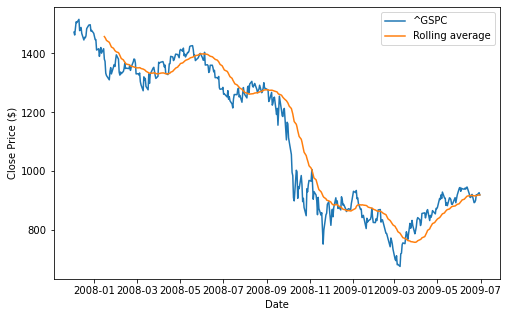

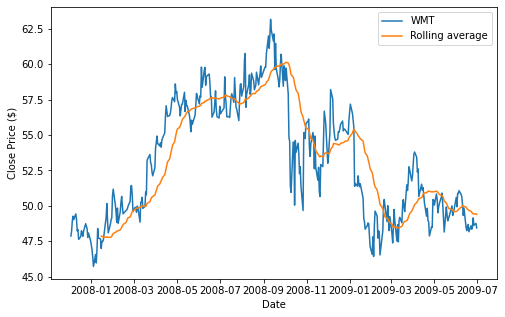

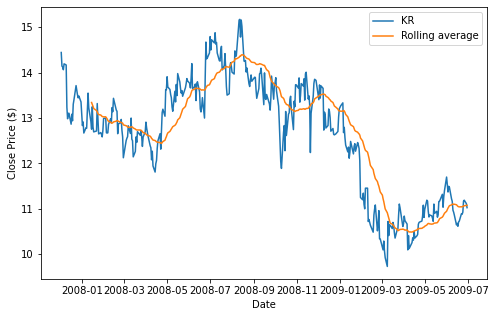

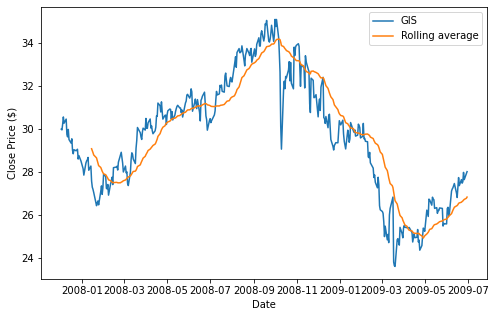

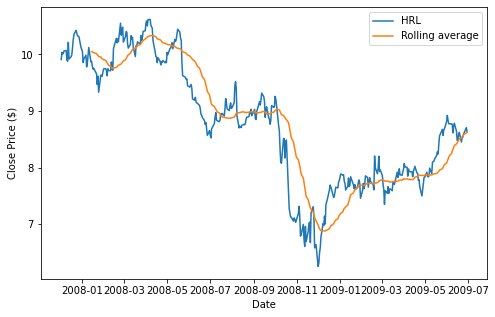

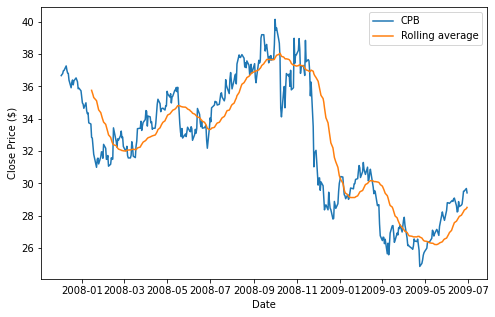

In [32]:
data_pack = readmydata(tickers=['^GSPC', 'WMT', 'KR', 'GIS', 'HRL', 'CPB'], start_date='2007-12-01', end_date='2009-06-30')
#data_pack.head(10)
pickmydata(data_pack, "Close", 30)

Looking for trends, we can see that retail company stocks would hit a dip during the 
recession, but the precentage of the dip would be less extreme than that of the S&P.

# Sensitive Companies

Companies that tend to perform terribly are those who depend on consumers being able to afford big ticket item, such as
cars, housing and plane tickets. The reasons depend on the industry, for example, though the car industry is quickly 
becoming a necessity, are quite expensive and that alone makes the demand for them fall during economic downturns.

count    397.000000
mean       7.024861
std        3.975925
min        1.760000
25%        3.600000
50%        6.800000
75%        8.750000
max       19.930000
Name: Close, dtype: float64

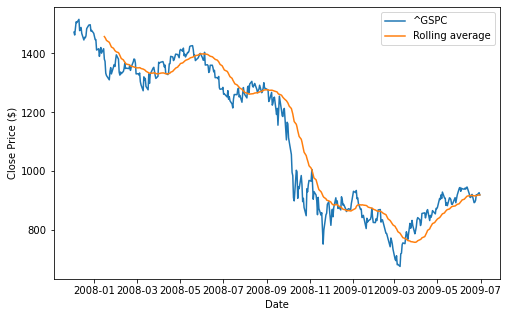

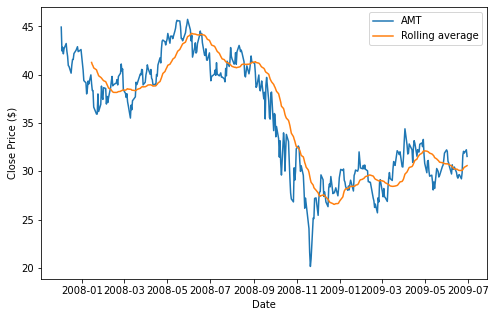

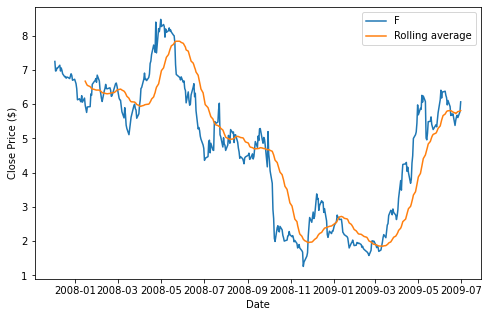

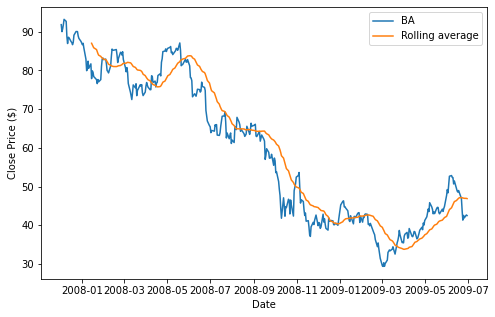

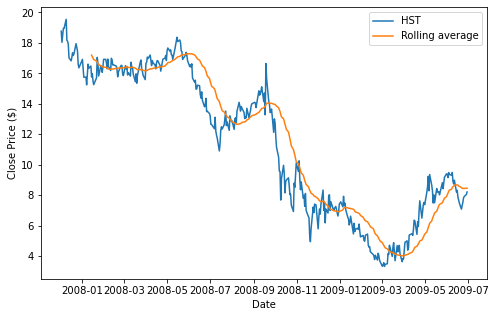

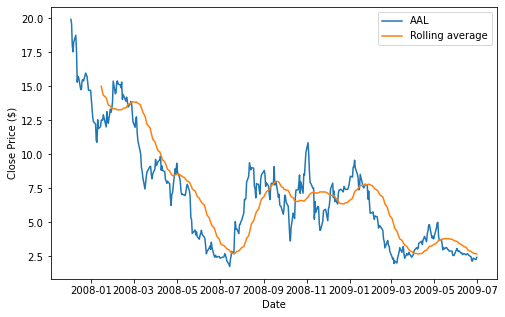

In [33]:
data_pack = readmydata(tickers=['^GSPC', 'AMT', 'F', 'BA', 'HST', 'AAL'], start_date='2007-12-01', end_date='2009-06-30')
#data_pack.head(10)
pickmydata(data_pack, "Close", 30)

These companies have got a dip that is either as sharp or worse than the S&P 500. Unlike the discount retail companies,
the industries that these commpanies belong to rely on consumer spending large amounts of money, a feature that is
stressed during economic downturns.